### A cluster-wise linear regression model for predicting adsorption energies of Li on 2D TMDs 

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# make a dictionary of the target variable [the adsorption energies E_ads (obtained using DFT)] and the physically-interpretable 
# descriptors for all TMD structures in the dataset
 
data = {'TMD_structure':  # regular TMD structures (such as MoS2) has Li adsorption on one side  
                          # Janus TMD structues (such as MoSSe) has adsorption on the 2 possible sides 
                          # MoSSe-S refers to adsorption on the S-side
       ['MoS2','MoS2','MoS2','MoS2','MoSe2','MoSe2','MoSe2','MoSe2','MoTe2','MoTe2','MoTe2','MoTe2',
        'WS2','WS2','WS2','WS2','WSe2','WSe2','WSe2','WSe2','WTe2','WTe2','WTe2','WTe2',
        'MoSSe-S','MoSSe-S','MoSSe-S','MoSSe-S','MoSSe-Se','MoSSe-Se','MoSSe-Se','MoSSe-Se',
        'MoSTe-S','MoSTe-S','MoSTe-S','MoSTe-S','MoSTe-Te','MoSTe-Te','MoSTe-Te','MoSTe-Te',
        'MoSeTe-Se','MoSeTe-Se','MoSeTe-Se','MoSeTe-Se','MoSeTe-Te','MoSeTe-Te','MoSeTe-Te','MoSeTe-Te',
        'WSSe-S','WSSe-S','WSSe-S','WSSe-S','WSSe-Se','WSSe-Se','WSSe-Se','WSSe-Se',
        'WSTe-S','WSTe-S','WSTe-S','WSTe-S','WSTe-Te','WSTe-Te','WSTe-Te','WSTe-Te',
        'WSeTe-Se','WSeTe-Se','WSeTe-Se','WSeTe-Se','WSeTe-Te','WSeTe-Te','WSeTe-Te','WSeTe-Te'],
       
       'supercell_size':[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,     # there are 4 supercell sizes for each tructure
                          1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,
                          1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4],
    
    
    'E_ads':[-1.824,-1.894,-1.986,-2.024,-1.724,-1.674,-1.657,-1.674,         # obtained from DFT calculations
                -1.580,-1.654,-1.544,-1.564,-1.695,-1.774,-1.641,-1.688,
                -1.614,-1.676,-1.486,-1.516,-1.492,-1.511,-1.485,-1.522,
                -1.887,-2.102,-2.114,-2.173,-1.672,-1.493,-1.478,-1.504,
                -2.038,-2.486,-2.527,-2.537,-1.469,-1.219,-1.219,-1.206,  
                -1.828,-2.027,-1.990,-2.021,-1.508,-1.272,-1.291,-1.301,
                -1.760,-2.033,-1.858,-1.877,-1.565,-1.426,-1.222,-1.235,
                -1.911,-2.375,-2.283,-2.299,-1.388,-1.099,-0.994,-1.001,
                -1.714,-1.968,-1.842,-1.861,-1.422,-1.252,-1.126,-1.140],
       
    'cbm':[-2.072312,-2.072312,-2.072312,-2.072312,                           # obtained from DFT calculations
           -1.80763,-1.80763,-1.80763,-1.80763,
           -1.027264,-1.027264,-1.027264,-1.027264,
           -1.814489,-1.814489,-1.814489,-1.814489,
           -1.536543,-1.536543,-1.536543,-1.536543,
           -1.021261,-1.021261,-1.021261,-1.021261,
           -1.96336,-1.96336,-1.96336,-1.96336,
           -1.96336,-1.96336,-1.96336,-1.96336,
           -1.715467,-1.715467,-1.715467,-1.715467,
           -1.715467,-1.715467,-1.715467,-1.715467,
           -1.465149,-1.465149,-1.465149,-1.465149,
           -1.465149,-1.465149,-1.465149,-1.465149,  
           -1.550521,-1.550521,-1.550521,-1.550521,
           -1.550521,-1.550521,-1.550521,-1.550521,
           -1.660678,-1.660678,-1.660678,-1.660678,
           -1.660678,-1.660678,-1.660678,-1.660678,
           -1.182705,-1.182705,-1.182705,-1.182705, 
           -1.182705,-1.182705,-1.182705,-1.182705],
       
    'vacuum':[2.245,2.245,2.245,2.245,                                       # obtained from DFT calculations
              2.09405,2.09405,2.09405,2.09405,
              2.702059,2.702059,2.702059,2.702059,
              2.133,2.133,2.133,2.133,
              2.158,2.158,2.158,2.158,
              2.69,2.69,2.69,2.69,
              2.5,2.5,2.5,2.5,
              1.82,1.82,1.82,1.82,
              3.02,3.02,3.02,3.02,
              1.56,1.56,1.56,1.56,
              2.777,2.777,2.777,2.777,
              2.03,2.03,2.03,2.03,
              2.59,2.59,2.59,2.59,
              1.85,1.85,1.85,1.85,
              3.03,3.03,3.03,3.03,
              1.61,1.61,1.61,1.61,
              2.69,2.69,2.69,2.69,
              2,2,2,2],
    
    'E_Li-TMD(bare)':[-0.00110,-0.00110,-0.00110,-0.00110,                    # obtained through a MATLAB code
                      -0.00120,-0.00120,-0.00120,-0.00120,                    # see the files (data.xlsx & MATLAB_calculator)
                      -0.00065,-0.00065,-0.00065,-0.00065,
                      -0.00310,-0.00310,-0.00310,-0.00310,
                      -0.00024,-0.00024,-0.00024,-0.00024,
                      -0.00036,-0.00036,-0.00036,-0.00036,
                      -1.33570,-1.33570,-1.33570,-1.33570,1.33330,1.33330,1.33330,1.33330,
                      -3.91630,-3.91630,-3.91630,-3.91630,3.91410,3.91410,3.91410,3.91410,
                      -2.40680,-2.40680,-2.40680,-2.40680,2.40510,2.40510,2.40510,2.40510,
                      -1.83160,-1.83160,-1.83160,-1.83160,1.82890,1.82890,1.82890,1.82890,
                      -4.32230,-4.32230,-4.32230,-4.32230,4.31970,4.31970,4.31970,4.31970,
                      -2.59010,-2.59010,-2.59010,-2.59010,2.58820,2.58820,2.58820,2.58820],  
    
    'E_Li-Li':[5.82719,4.38995,3.90081,3.94406,                              # obtained from DFT calculations
               5.80762,4.42304,3.95263,3.99413,  
               5.77492,4.47550,4.03497,4.07376, 
               5.82872,4.38729,3.89664,3.94005,
               5.80614,4.42549,3.95645,3.99782,
               5.77220,4.47974,4.04152,4.08020,
               5.81808,4.40556,3.92521,3.96766,5.81808,4.40556,3.92521,3.96766,
               5.80320,4.43032,3.97641,4.00513,5.80320,4.43032,3.97641,4.00513,
               5.79306,4.44675,3.99027,4.03006,5.79306,4.44675,3.99027,4.03006,
               5.81960,4.40300,3.92120,3.96379,5.81960,4.40300,3.92120,3.96379,
               5.80320,4.43032,3.97641,4.00513,5.80320,4.43032,3.97641,4.00513,
               5.79306,4.44675,3.99027,4.03006,5.79306,4.44675,3.99027,4.03006]}       

In [3]:
# make a dataframe of the data
df = pd.DataFrame.from_dict(data)
df 

,TMD_structure,supercell_size,E_ads,cbm,vacuum,E_Li-TMD(bare),E_Li-Li
0,MoS2,1,-1.824,-2.072312,2.24500,-0.0011,5.82719
1,MoS2,2,-1.894,-2.072312,2.24500,-0.0011,4.38995
2,MoS2,3,-1.986,-2.072312,2.24500,-0.0011,3.90081
3,MoS2,4,-2.024,-2.072312,2.24500,-0.0011,3.94406
4,MoSe2,1,-1.724,-1.807630,2.09405,-0.0012,5.80762
...,...,...,...,...,...,...,...
67,WSeTe-Se,4,-1.861,-1.182705,2.69000,-2.5901,4.03006
68,WSeTe-Te,1,-1.422,-1.182705,2.00000,2.5882,5.79306
69,WSeTe-Te,2,-1.252,-1.182705,2.00000,2.5882,4.44675
70,WSeTe-Te,3,-1.126,-1.182705,2.00000,2.5882,3.99027


In [4]:
E_ion = 5.39 # ionization energy of Li in eV

# define energy of lowest unoccupied state E_LUS
df['E_LUS'] = df['cbm'] - df['vacuum'] 

# define coupling energy E_coup
df['E_coup'] = df['E_ads'] - (E_ion + df['E_LUS'] + df['E_Li-Li'])  

# drop the unnecessary columns
df.drop(['cbm','vacuum'], axis=1, inplace = True) 
df

,TMD_structure,supercell_size,E_ads,E_Li-TMD(bare),E_Li-Li,E_LUS,E_coup
0,MoS2,1,-1.824,-0.0011,5.82719,-4.317312,-8.723878
1,MoS2,2,-1.894,-0.0011,4.38995,-4.317312,-7.356638
2,MoS2,3,-1.986,-0.0011,3.90081,-4.317312,-6.959498
3,MoS2,4,-2.024,-0.0011,3.94406,-4.317312,-7.040748
4,MoSe2,1,-1.724,-0.0012,5.80762,-3.901680,-9.019940
...,...,...,...,...,...,...,...
67,WSeTe-Se,4,-1.861,-2.5901,4.03006,-3.872705,-7.408355
68,WSeTe-Te,1,-1.422,2.5882,5.79306,-3.182705,-9.422355
69,WSeTe-Te,2,-1.252,2.5882,4.44675,-3.182705,-7.906045
70,WSeTe-Te,3,-1.126,2.5882,3.99027,-3.182705,-7.323565


In [5]:
# split the dataframe into 4 dataframes according to supercell size -- the clustering step
df1=df[df['supercell_size']==1]
df2=df[df['supercell_size']==2]
df3=df[df['supercell_size']==3]
df4=df[df['supercell_size']==4]

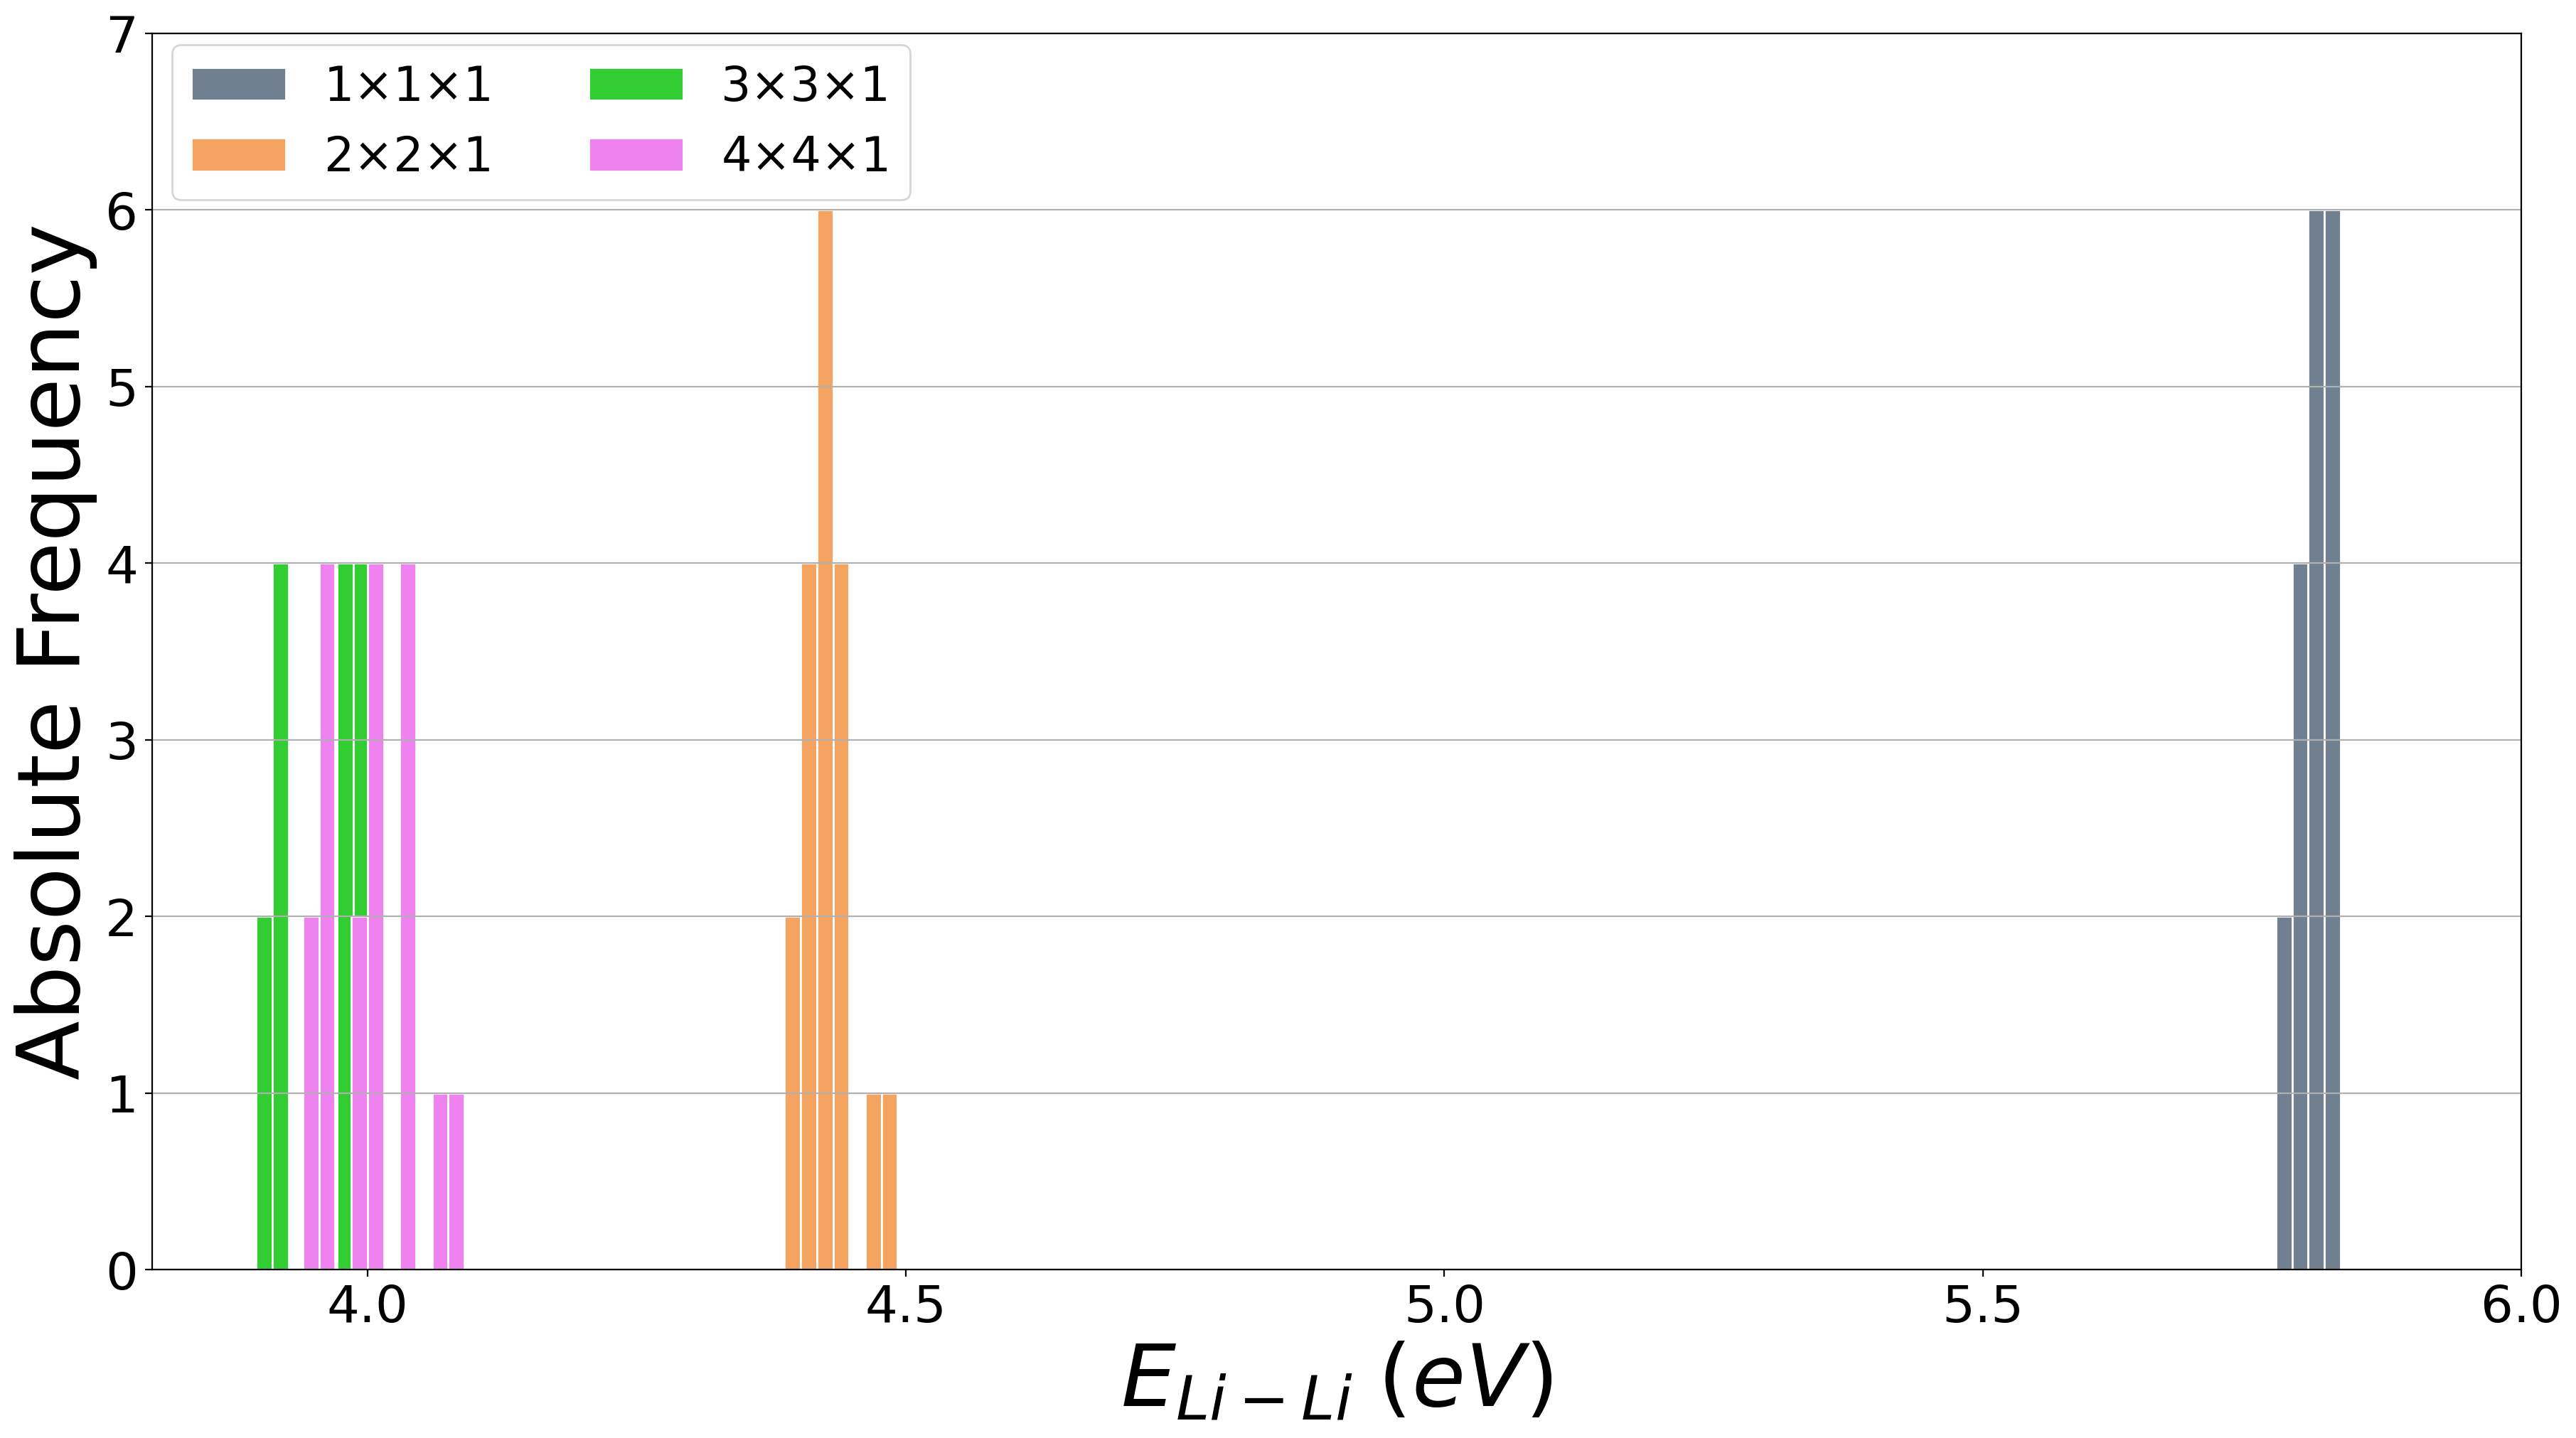

In [8]:
# plot a histogram for E_Li-Li
binwidth=0.015
plt.figure(figsize = (18,10),dpi=200, constrained_layout=True)
plt.hist(df1['E_Li-Li'],bins=np.arange(df1['E_Li-Li'].min(), df1['E_Li-Li'].max() + binwidth, binwidth), color='slategrey', edgecolor = 'white', label = '1×1×1')
plt.hist(df2['E_Li-Li'],bins=np.arange(df2['E_Li-Li'].min(), df2['E_Li-Li'].max() + binwidth, binwidth),color='sandybrown', edgecolor = 'white', label = '2×2×1')
plt.hist(df3['E_Li-Li'],bins=np.arange(df3['E_Li-Li'].min(), df3['E_Li-Li'].max() + binwidth, binwidth),color='limegreen', edgecolor = 'white', label = '3×3×1')
plt.hist(df4['E_Li-Li'],bins=np.arange(df4['E_Li-Li'].min(), df4['E_Li-Li'].max() + binwidth, binwidth),color='violet', edgecolor = 'white', label = '4×4×1')

plt.grid(axis='y')

plt.legend(bbox_to_anchor=(.33, 1.01),ncol=2,fontsize=24)
plt.xlabel('$E_{Li-Li}\;(eV)$',fontsize=44)
plt.ylabel('Absolute Frequency',fontsize=44)

# Edit the ticks of the x and y axes
plt.xticks(np.arange(4, 6.25, step=0.5),fontsize=26)
plt.yticks(np.arange(0, 8, step=1),fontsize=26)

#plt.savefig('Li-Li.eps')
plt.show()

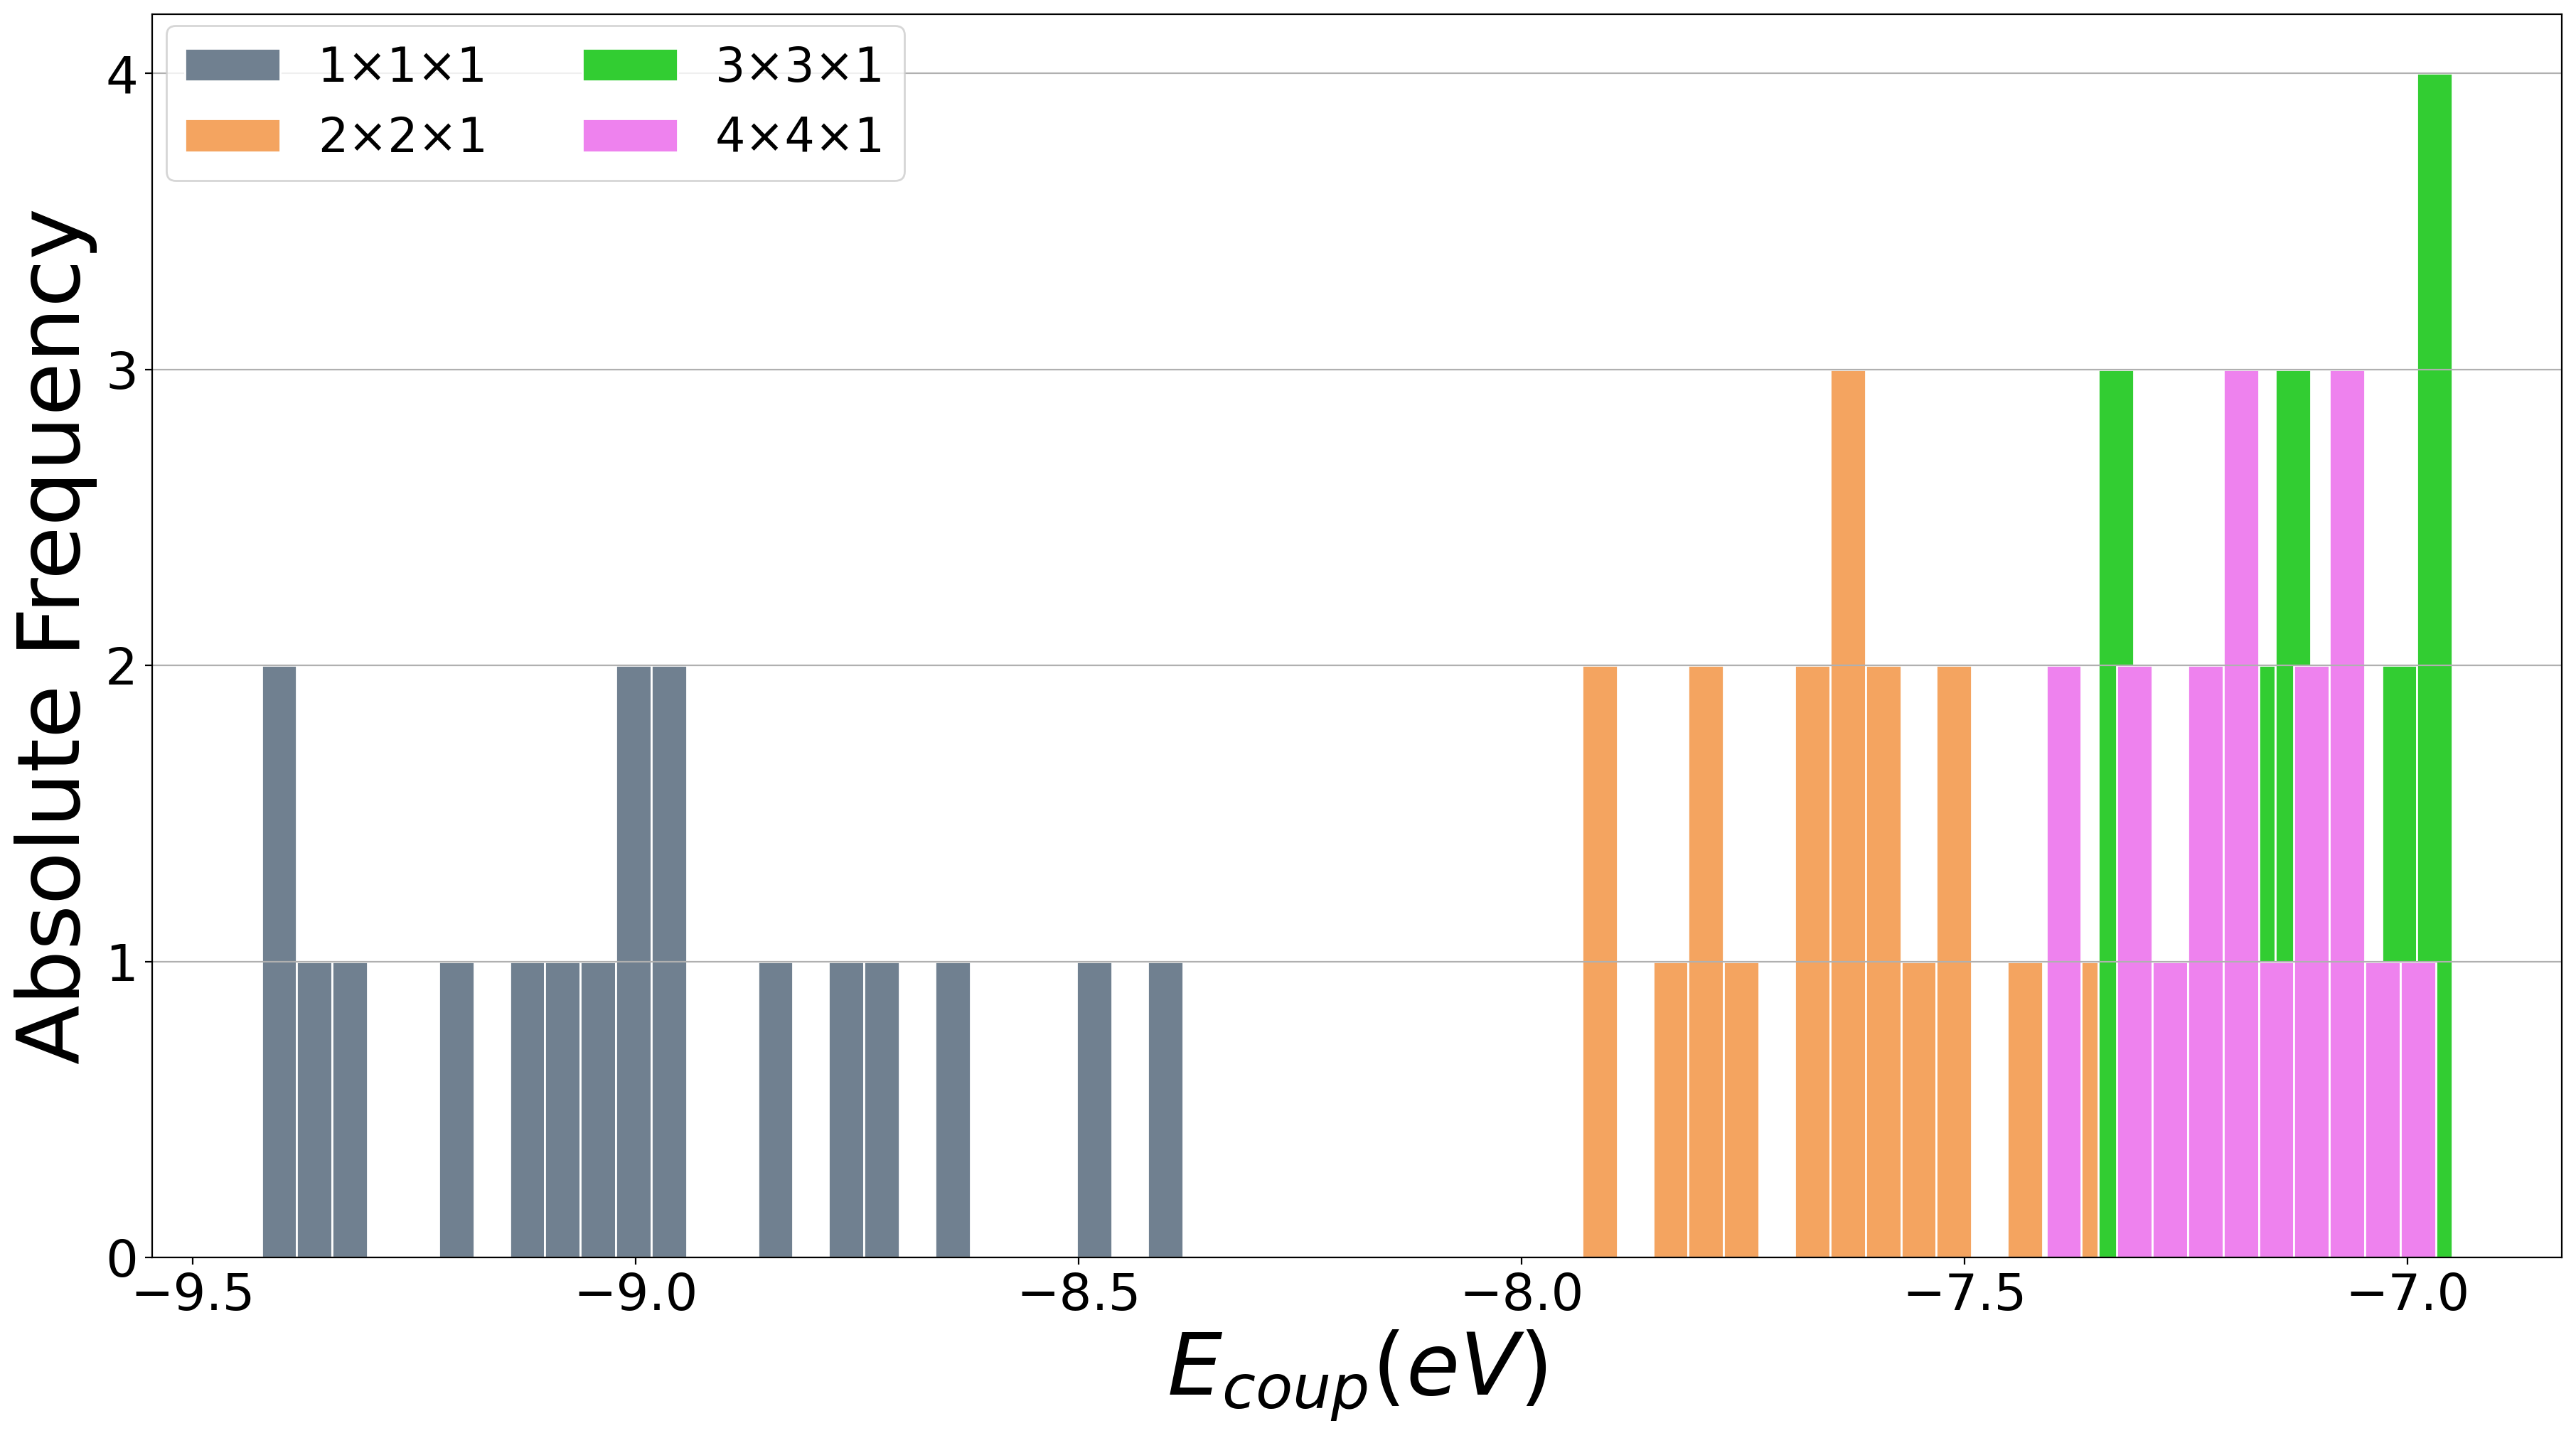

In [9]:
# plot a histogram for E_coup
binwidth=0.04
plt.figure(figsize = (18,10),dpi=200, constrained_layout=True)
plt.hist(df1['E_coup'],bins=np.arange(df1['E_coup'].min(), df1['E_coup'].max() + binwidth, binwidth), color='slategrey', edgecolor = 'white', label = '1×1×1')
plt.hist(df2['E_coup'],bins=np.arange(df2['E_coup'].min(), df2['E_coup'].max() + binwidth, binwidth),color='sandybrown', edgecolor = 'white', label = '2×2×1')
plt.hist(df3['E_coup'],bins=np.arange(df3['E_coup'].min(), df3['E_coup'].max() + binwidth, binwidth),color='limegreen', edgecolor = 'white', label = '3×3×1')
plt.hist(df4['E_coup'],bins=np.arange(df4['E_coup'].min(), df4['E_coup'].max() + binwidth, binwidth),color='violet', edgecolor = 'white', label = '4×4×1')

plt.grid(axis='y')

plt.legend(bbox_to_anchor=(.322, 1.01),ncol=2,fontsize=24)
plt.xlabel('$E_{coup} (eV)$',fontsize=44)
plt.ylabel('Absolute Frequency',fontsize=44)

# Edit the ticks of the x and y axes
plt.xticks(np.arange(-9.5, -6.75, step=0.5),fontsize=26)
plt.yticks(np.arange(0, 5, step=1),fontsize=26)

#plt.savefig('E_coup.eps')
plt.show()

In [10]:
# Concatenate the dataframes for 3x3 and 4x4 supercells as they appear to form one united cluster
df34 = pd.concat([df3,df4])
df34.shape # check the dimensions of df34

(36, 7)

In [11]:
# Define the inputs (X) and outputs (y) of the model 
y1 = df1['E_ads'].values 
X1 = df1[['E_LUS','E_Li-TMD(bare)','E_Li-Li']]

y2 = df2['E_ads'].values 
X2 = df2[['E_LUS','E_Li-TMD(bare)','E_Li-Li']]

y34 = df34['E_ads'].values 
X34 = df34[['E_LUS','E_Li-TMD(bare)','E_Li-Li']]

In [12]:
# Standardize the descriptors(features)
mean1 = X1.mean(axis=0)
std1 = X1.std(axis=0)
X1 = (X1 - mean1) / std1         # comment this line if you want unstandardized descriptors 

mean2 = X2.mean(axis=0)
std2 = X2.std(axis=0)
X2 = (X2 - mean2) / std2         # comment this line if you want unstandardized descriptors 

mean34 = X34.mean(axis=0)
std34 = X34.std(axis=0)
X34 = (X34 - mean34) / std34     # comment this line if you want unstandardized descriptors 

In [13]:
# make 3 ordinary least squares (OLS) linear regression sub-models (one for each cluster)
model_1 = linear_model.LinearRegression()
model_2 = linear_model.LinearRegression()
model_34 = linear_model.LinearRegression()

In [53]:
# Select cross-validation K-fold schemes
from sklearn.model_selection import KFold
kfold1 = KFold(n_splits=3,shuffle = True,random_state=7)
kfold2 = KFold(n_splits=3,shuffle = True,random_state=8)
kfold34 = KFold(n_splits=3,shuffle = True,random_state=13)

In [54]:
# Apply cross validation (CV) for the 3 linear sub-models
from sklearn.model_selection import cross_val_score
scores_1 = cross_val_score(model_1, X1, y1, scoring='neg_mean_squared_error', cv=kfold1)
scores_2 = cross_val_score(model_2, X2, y2, scoring='neg_mean_squared_error', cv=kfold2)
scores_34 = cross_val_score(model_34, X34, y34, scoring='neg_mean_squared_error', cv=kfold34)

# calculate the rmse scores for the different models generated through CV 
# Do this for the 3 categories .. 3 categories x 3 CV models models >> 9 rmse scores
rmse_scores_1 = [np.sqrt(abs(s)) for s in scores_1]
rmse_scores_2 = [np.sqrt(abs(s)) for s in scores_2]
rmse_scores_34 = [np.sqrt(abs(s)) for s in scores_34]

# gather the 9 rmse CV scores into one list
rmse_scores= rmse_scores_1 + rmse_scores_2 + rmse_scores_34

In [55]:
# print the average CV rmse for each category 
s1 = np.mean(rmse_scores_1)
s2 = np.mean(rmse_scores_2)
s34 = np.mean(rmse_scores_34)

print('Averaged CV RMSE from 1x1: {:.3f}'.format(s1))
print('Averaged CV RMSE from 2x2: {:.3f}'.format(s2))
print('Averaged CV RMSE from 3x3 & 4x4: {:.3f}'.format(s34))

print('.........................................')
# print the CV RMSE from all scores
print('Averaged CV RMSE from all scores: {:.4f}'.format(np.mean(rmse_scores))) 

Averaged CV RMSE from 1x1: 0.043
Averaged CV RMSE from 2x2: 0.057
Averaged CV RMSE from 3x3 & 4x4: 0.066
.........................................
Averaged CV RMSE from all scores: 0.0554


In [56]:
# Fit the 3 OLS sub-models to their respective data
regr_1 = model_1.fit(X1, y1)
regr_2 = model_2.fit(X2, y2)
regr_34 = model_34.fit(X34, y34)

In [57]:
# Find the overall CV R^2 as a weighted average of the CV R^2 inside each category
regr_score_mean = 0.25 * regr_1.score(X1, y1) + 0.25 * regr_2.score(X2, y2) + 0.5 * regr_34.score(X34, y34)
print('Averaged CV R^2: {:.3f}'.format(regr_score_mean))

Averaged CV R^2: 0.973


In [58]:
# print the regression parameters
print('regression parameters a, b, c ')
print('------------------')
print(regr_1.coef_)
print(regr_2.coef_)
print(regr_34.coef_)

regression parameters a, b, c 
------------------
[ 0.1291682   0.04380639 -0.0320949 ]
[0.15093925 0.24903637 0.03484612]
[ 0.33718672  0.08449064 -0.01544693]


In [59]:
# print the regression intercepts
print('intercept d ')
print('------------------')
print(regr_1.intercept_)
print(regr_2.intercept_)
print(regr_34.intercept_)

intercept d 
------------------
-1.6717222222222214
-1.7186111111111113
-1.6634999999999989


In [60]:
# predict with the model
y1_pred = regr_1.predict(X1)
y2_pred = regr_2.predict(X2)
y34_pred = regr_34.predict(X34)

# make 2 lists of y and y_pred
y_pred = np.array(list(y1_pred) + list(y2_pred) + list(y34_pred))
y = np.array(list(y1) + list(y2) + list(y34)) 

In [61]:
# For plotting a regression fitting curve, build a new dataframe for this purpose
dic_1 = {'DFT ads_energy':y,'Predicted ads_energy':y_pred,
         'TMD_structure': ['MoS2','MoSe2','MoTe2','WS2','WSe2','WTe2',
                        'MoSSe','MoSSe','MoSTe','MoSTe','MoSeTe','MoSeTe',
                        'WSSe','WSSe','WSTe','WSTe','WSeTe','WSeTe',
                           'MoS2','MoSe2','MoTe2','WS2','WSe2','WTe2',
                        'MoSSe','MoSSe','MoSTe','MoSTe','MoSeTe','MoSeTe',
                        'WSSe','WSSe','WSTe','WSTe','WSeTe','WSeTe',
                           'MoS2','MoSe2','MoTe2','WS2','WSe2','WTe2',
                        'MoSSe','MoSSe','MoSTe','MoSTe','MoSeTe','MoSeTe',
                        'WSSe','WSSe','WSTe','WSTe','WSeTe','WSeTe',
                           'MoS2','MoSe2','MoTe2','WS2','WSe2','WTe2',
                        'MoSSe','MoSSe','MoSTe','MoSTe','MoSeTe','MoSeTe',
                        'WSSe','WSSe','WSTe','WSTe','WSeTe','WSeTe'],
         
         'supercell':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                      2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
                      3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
                      4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4],
         
         'adsorption_side':[0,0,0,0,0,0,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1, 
                           0,0,0,0,0,0,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,
                           0,0,0,0,0,0,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,  # Note: 0,1, and -1 are just to for plotting purpose
                           0,0,0,0,0,0,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1]} # but no physical meaning behind 

data = pd.DataFrame.from_dict(dic_1)

In [62]:
# print the statistical measures of the CLR model acting on the whole datset
print('Statistical measures of the CLR final model acting on the whole datset:')
print('................................')
print('Root Mean squared error: %.4f'
      % (mean_squared_error(y_pred, y))**.5)

print('Mean absolute error: %.4f'
      % (mean_absolute_error(y_pred, y)))

print('R^2: %.4f'
      % (r2_score(y_pred, y)))

Statistical measures of the CLR final model acting on the whole datset:
................................
Root Mean squared error: 0.0546
Mean absolute error: 0.0435
R^2: 0.9765


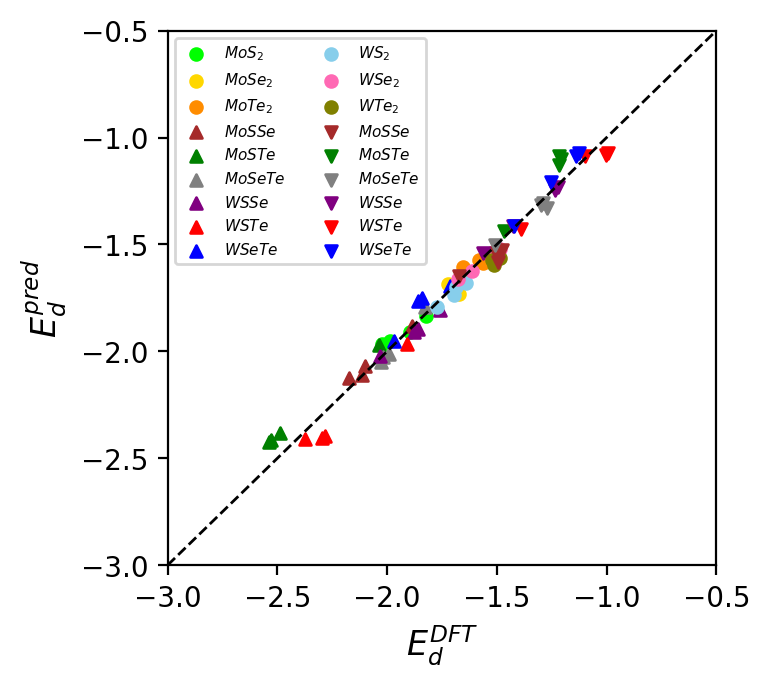

In [67]:
# plot fitting curve
X_1 = data[data['TMD_structure']=='MoS2']['DFT ads_energy']
X_2 = data[data['TMD_structure']=='MoSe2']['DFT ads_energy']
X_3 = data[data['TMD_structure']=='MoTe2']['DFT ads_energy']
X_4 = data[data['TMD_structure']=='WS2']['DFT ads_energy']
X_5 = data[data['TMD_structure']=='WSe2']['DFT ads_energy']
X_6 = data[data['TMD_structure']=='WTe2']['DFT ads_energy']
# ............
X_7 = data[(data['TMD_structure']=='MoSSe') & (data['adsorption_side']==1)]['DFT ads_energy']
X_8 = data[(data['TMD_structure']=='MoSTe')& (data['adsorption_side']==1)]['DFT ads_energy']
X_9 = data[(data['TMD_structure']=='MoSeTe')& (data['adsorption_side']==1)]['DFT ads_energy']
X_10 = data[(data['TMD_structure']=='WSSe')& (data['adsorption_side']==1)]['DFT ads_energy']
X_11 = data[(data['TMD_structure']=='WSTe')& (data['adsorption_side']==1)]['DFT ads_energy']
X_12 = data[(data['TMD_structure']=='WSeTe') & (data['adsorption_side']==1)]['DFT ads_energy']
# ............
X_13 = data[(data['TMD_structure']=='MoSSe') & (data['adsorption_side']==-1)]['DFT ads_energy']
X_14 = data[(data['TMD_structure']=='MoSTe') & (data['adsorption_side']==-1)]['DFT ads_energy']
X_15 = data[(data['TMD_structure']=='MoSeTe') & (data['adsorption_side']==-1)]['DFT ads_energy']
X_16 = data[(data['TMD_structure']=='WSSe') & (data['adsorption_side']==-1)]['DFT ads_energy']
X_17 = data[(data['TMD_structure']=='WSTe') & (data['adsorption_side']==-1)]['DFT ads_energy']
X_18 = data[(data['TMD_structure']=='WSeTe') & (data['adsorption_side']==-1)]['DFT ads_energy']
# ............................
Y_1 = data[data['TMD_structure']=='MoS2']['Predicted ads_energy']
Y_2 = data[data['TMD_structure']=='MoSe2']['Predicted ads_energy']
Y_3 = data[data['TMD_structure']=='MoTe2']['Predicted ads_energy']
Y_4 = data[data['TMD_structure']=='WS2']['Predicted ads_energy']
Y_5 = data[data['TMD_structure']=='WSe2']['Predicted ads_energy']
Y_6 = data[data['TMD_structure']=='WTe2']['Predicted ads_energy']
# ............
Y_7 = data[(data['TMD_structure']=='MoSSe')& (data['adsorption_side']==1)]['Predicted ads_energy']
Y_8 = data[(data['TMD_structure']=='MoSTe')& (data['adsorption_side']==1)]['Predicted ads_energy']
Y_9 = data[(data['TMD_structure']=='MoSeTe')& (data['adsorption_side']==1)]['Predicted ads_energy']
Y_10 = data[(data['TMD_structure']=='WSSe')& (data['adsorption_side']==1)]['Predicted ads_energy']
Y_11 = data[(data['TMD_structure']=='WSTe')& (data['adsorption_side']==1)]['Predicted ads_energy']
Y_12 = data[(data['TMD_structure']=='WSeTe') & (data['adsorption_side']==1)]['Predicted ads_energy']
# ............
Y_13 = data[(data['TMD_structure']=='MoSSe') & (data['adsorption_side']==-1)]['Predicted ads_energy']
Y_14 = data[(data['TMD_structure']=='MoSTe') & (data['adsorption_side']==-1)]['Predicted ads_energy']
Y_15 = data[(data['TMD_structure']=='MoSeTe') & (data['adsorption_side']==-1)]['Predicted ads_energy']
Y_16 = data[(data['TMD_structure']=='WSSe') & (data['adsorption_side']==-1)]['Predicted ads_energy']
Y_17 = data[(data['TMD_structure']=='WSTe') & (data['adsorption_side']==-1)]['Predicted ads_energy']
Y_18 = data[(data['TMD_structure']=='WSeTe') & (data['adsorption_side']==-1)]['Predicted ads_energy']
# ............................

fig = plt.figure(figsize=(3.54,3.54), dpi=200)
# ......
plt.scatter(X_1, Y_1, label= '$MoS_2$', marker = 'o',c='lime',s=18)
plt.scatter(X_2, Y_2, label= '$MoSe_2$', marker = 'o',c='gold',s=18)
plt.scatter(X_3, Y_3, label= '$MoTe_2$', marker = 'o',c='darkorange',s=18)
plt.scatter(X_7, Y_7, label= '$MoSSe$',  marker = '^',c='brown',s=18)
plt.scatter(X_8, Y_8, label='$MoSTe$', marker = '^',c='green',s=18)
plt.scatter(X_9, Y_9, label='$MoSeTe$', marker = '^',c='gray',s=18)
plt.scatter(X_10, Y_10, label='$WSSe$', marker = '^',c='purple',s=18)
plt.scatter(X_11, Y_11, label='$WSTe$', marker = '^',c='red',s=18)
plt.scatter(X_12, Y_12, label='$WSeTe$', marker = '^',c='blue',s=18)
plt.scatter(X_4, Y_4, label= '$WS_2$', marker = 'o',c='skyblue',s=18)
plt.scatter(X_5, Y_5, label= '$WSe_2$', marker = 'o',c='hotpink',s=18)
plt.scatter(X_6, Y_6, label= '$WTe_2$', marker = 'o',c='olive',s=18)
plt.scatter(X_13, Y_13, label= '$MoSSe$', marker = 'v',c='brown',s=18)
plt.scatter(X_14, Y_14, label='$MoSTe$', marker = 'v',c='green',s=18)
plt.scatter(X_15, Y_15, label='$MoSeTe$', marker = 'v',c='gray',s=18)
plt.scatter(X_16, Y_16, label='$WSSe$', marker = 'v',c='purple',s=18)
plt.scatter(X_17, Y_17, label='$WSTe$', marker = 'v',c='red',s=18)
plt.scatter(X_18, Y_18, label='$WSeTe$', marker = 'v',c='blue',s=18)

plt.legend(bbox_to_anchor=(.485, 1),ncol=2,fontsize=5.5)

plt.xlabel("$E_d^{DFT}$",fontsize=12)
plt.ylabel("$E_d^{pred}$",fontsize=12)

plt.xlim(-3, -0.5)
plt.ylim(-3, -0.5)

# plot the x=y fitting dashed line
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False)

# Edit the ticks of the x and y axes
plt.xticks(np.arange(-3, 0, step=0.5))
plt.yticks(np.arange(-3, 0, step=0.5))

#plt.savefig('ML1.eps')
plt.show()

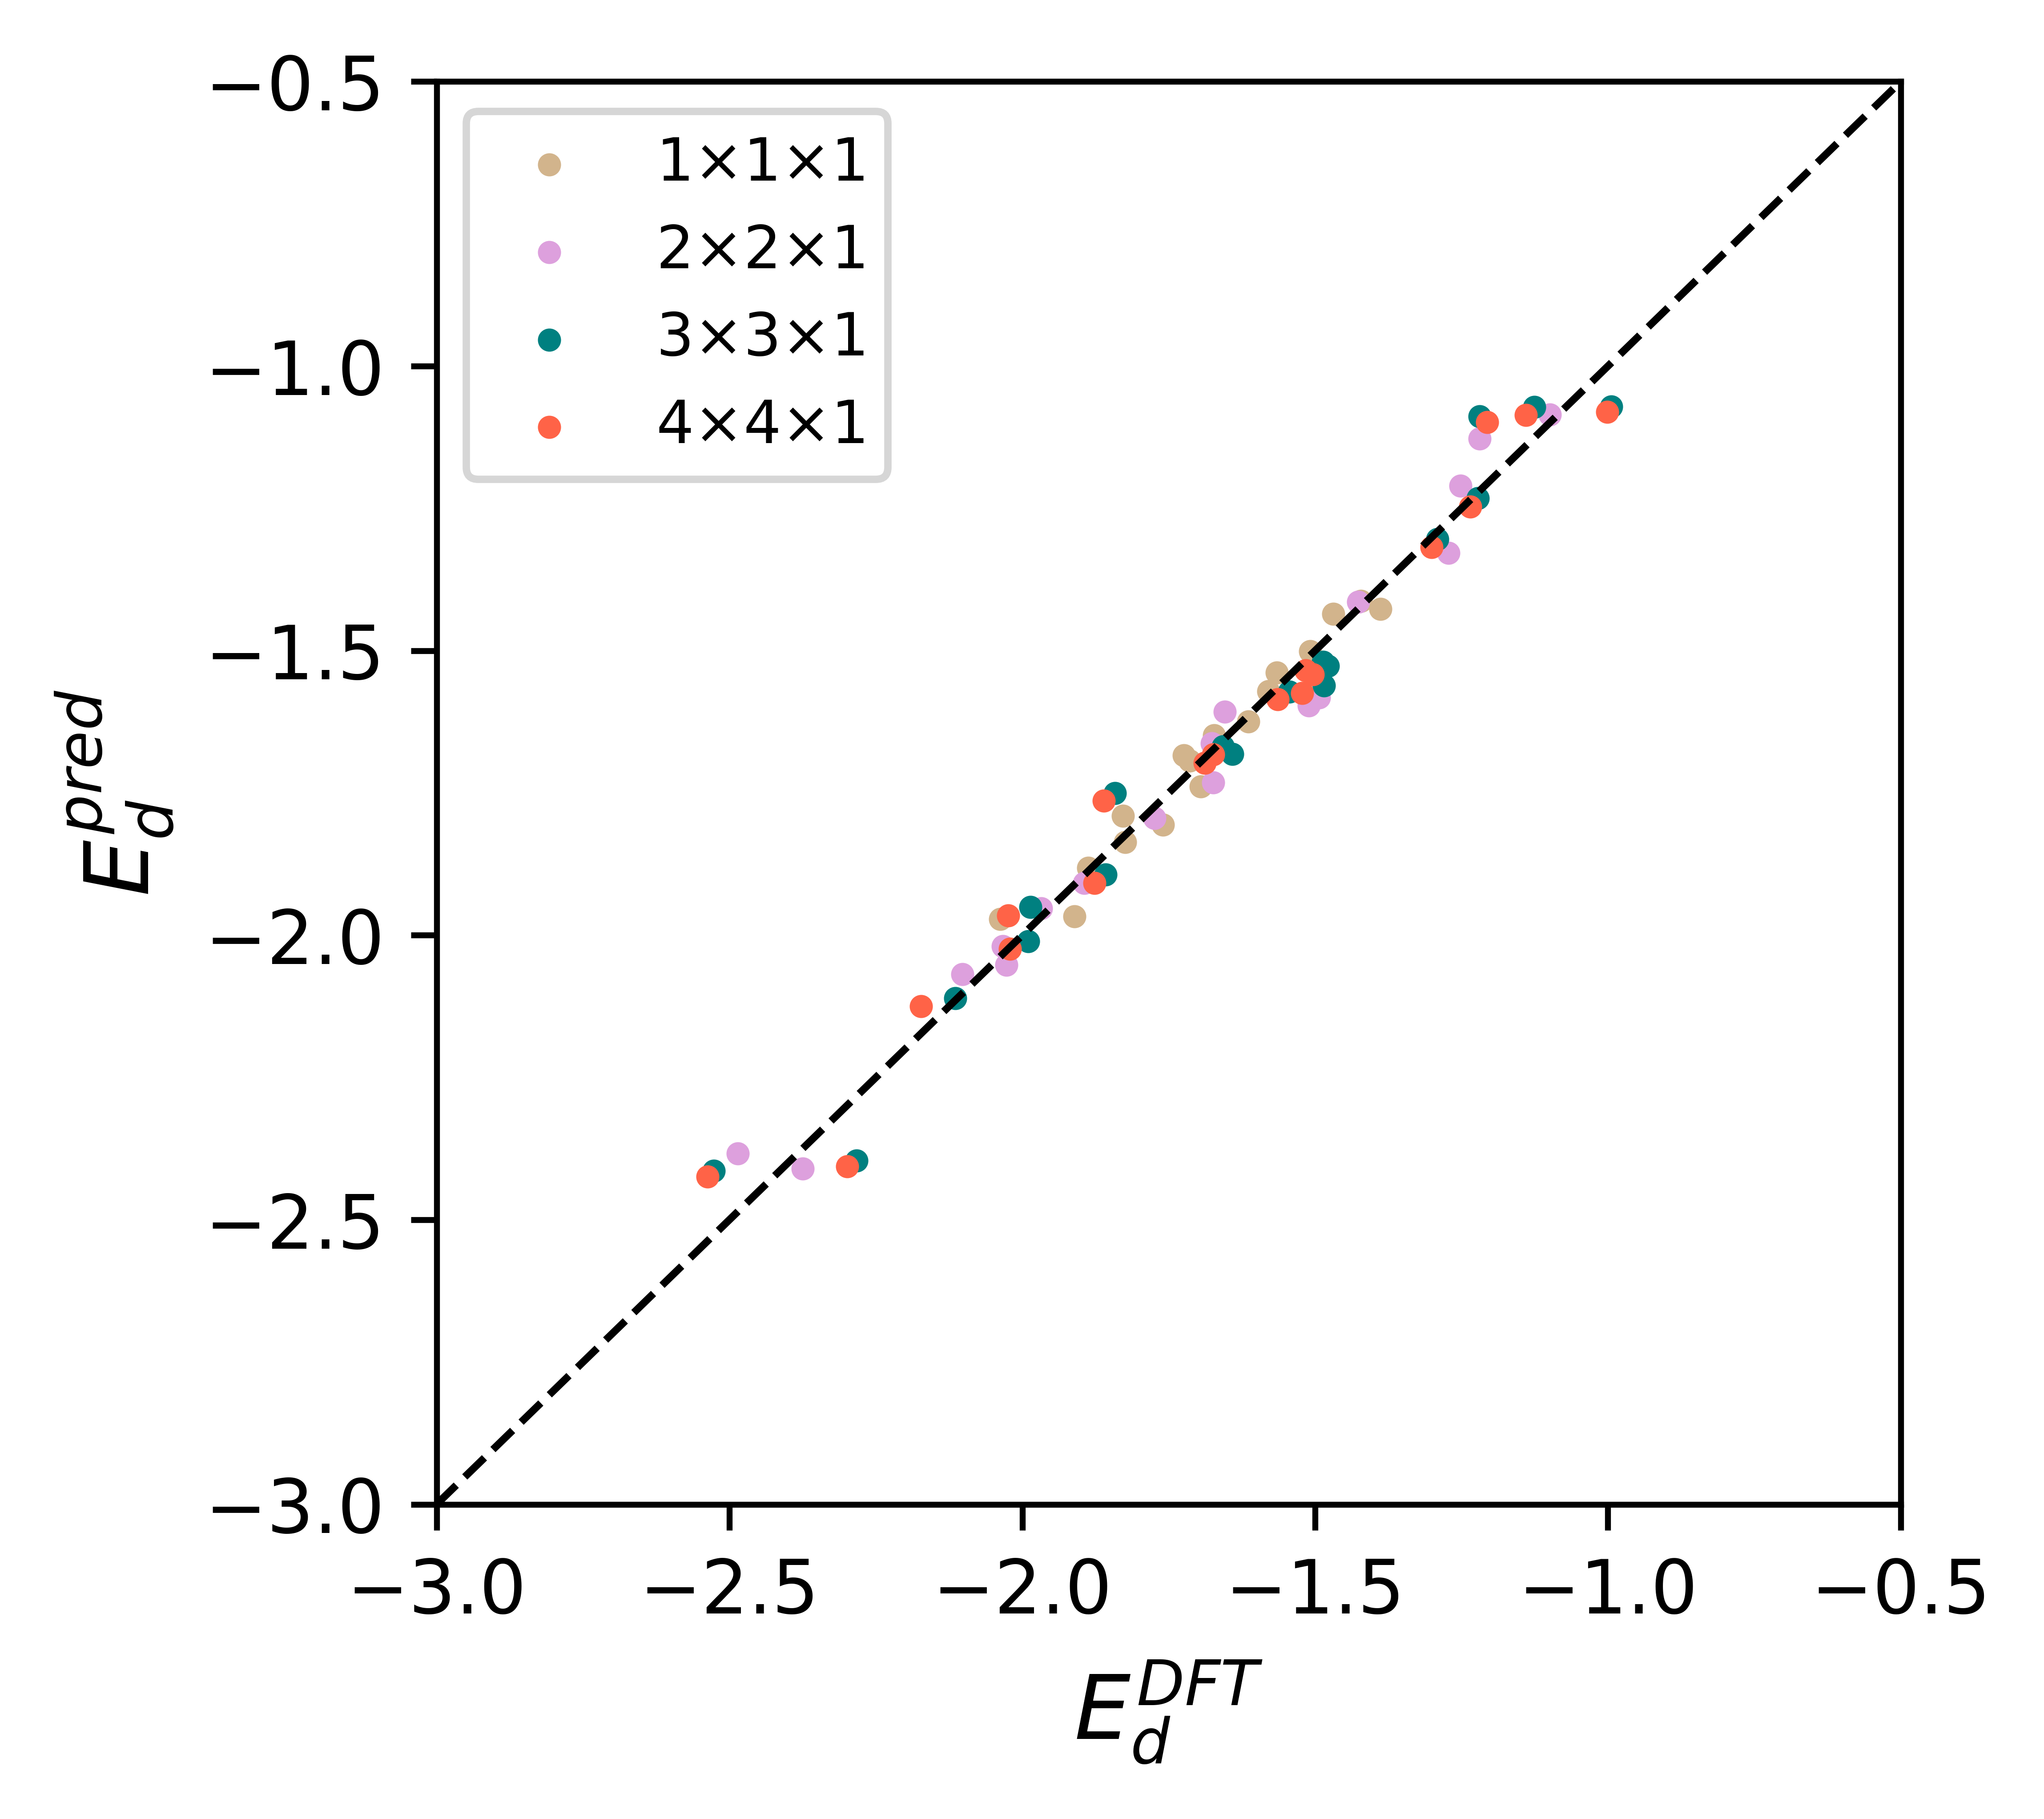

In [68]:
# plot fitting curve
X_1 = data[data['supercell']==1]['DFT ads_energy']
X_2 = data[data['supercell']==2]['DFT ads_energy']
X_3 = data[data['supercell']==3]['DFT ads_energy']
X_4 = data[data['supercell']==4]['DFT ads_energy']


Y_1 = data[data['supercell']==1]['Predicted ads_energy']
Y_2 = data[data['supercell']==2]['Predicted ads_energy']
Y_3 = data[data['supercell']==3]['Predicted ads_energy']
Y_4 = data[data['supercell']==4]['Predicted ads_energy']


fig = plt.figure(figsize=(3.54,3.53), dpi=1200)
plt.scatter(X_1, Y_1, label= '$1×1×1$', marker = '.',c='tan',s=18)
plt.scatter(X_2, Y_2, label= '$2×2×1$', marker = '.',c='plum',s=18)
plt.scatter(X_3, Y_3, label= '$3×3×1$', marker = '.',c='teal',s=18)
plt.scatter(X_4, Y_4, label= '$4×4×1$', marker = '.',c='tomato',s=18)


plt.legend(fontsize=8)
plt.xlabel("$E_d^{DFT}$",fontsize=12)
plt.ylabel("$E_d^{pred}$",fontsize=12)

plt.xlim(-3, -0.5)
plt.ylim(-3, -0.5)

# plot the x=y fitting dashed line
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False)

# Edit the ticks of the x and y axes
plt.xticks(np.arange(-3, 0, step=0.5))
plt.yticks(np.arange(-3, 0, step=0.5))

#plt.savefig('ML2.eps')
plt.show()